# Surprise Housing

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

<ol> 
    <li> Which variables are significant in predicting the price of a house, and
    <li>How well those variables describe the price of a house.
</ol>

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Steps taken to build model.

1. Data Understanding and Exploration.
2. EDA 
3. Outlier treatment
4. Ridge Regression
5. Lasso Regression
6. Conclusion

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house.shape

(1460, 81)

In [6]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(house.isnull().sum().sort_values(ascending=False), columns=['Total'])
perc  = pd.DataFrame(round(100*(house.isnull().sum()/house.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, perc], axis = 1)

Total  Percentage
PoolQC          1453       99.52
MiscFeature     1406       96.30
Alley           1369       93.77
Fence           1179       80.75
FireplaceQu      690       47.26
LotFrontage      259       17.74
GarageCond        81        5.55
GarageType        81        5.55
GarageYrBlt       81        5.55
GarageFinish      81        5.55
GarageQual        81        5.55
BsmtExposure      38        2.60
BsmtFinType2      38        2.60
BsmtFinType1      37        2.53
BsmtCond          37        2.53
BsmtQual          37        2.53
MasVnrArea         8        0.55
MasVnrType         8        0.55
Electrical         1        0.07
Utilities          0        0.00
YearRemodAdd       0        0.00
MSSubClass         0        0.00
Foundation         0        0.00
ExterCond          0        0.00
ExterQual          0        0.00
Exterior2nd        0        0.00
Exterior1st        0        0.00
RoofMatl           0        0.00
RoofStyle          0        0.00
YearBuilt          0        0.00
...              ...         ...
GarageArea         0        0.00
PavedDrive         0        0.00
WoodDeckSF         0        0.00
OpenPorchSF        0        0.00
3SsnPorch          0        0.00
BsmtUnfSF          0        0.00
ScreenPorch        0        0.00
PoolArea           0        0.00
MiscVal            0        0.00
MoSold             0        0.00
YrSold             0        0.00
SaleType           0        0.00
Functional         0        0.00
TotRmsAbvGrd       0        0.00
KitchenQual        0        0.00
KitchenAbvGr       0        0.00
BedroomAbvGr       0        0.00
HalfBath           0        0.00
FullBath           0        0.00
BsmtHalfBath       0        0.00
BsmtFullBath       0        0.00
GrLivArea          0        0.00
LowQualFinSF       0        0.00
2ndFlrSF           0        0.00
1stFlrSF           0        0.00
CentralAir         0        0.00
SaleCondition      0        0.00
Heating            0        0.00
TotalBsmtSF        0        0.00
Id                 0        0.00

[81 rows x 2 columns]

In [7]:
# As we see column 'PoolQC' is having 99.52% of null values.
# PoolQC: Pool quality
#      Ex	Excellent
#      Gd	Good
#      TA	Average/Typical
#      Fa	Fair
#      NA	No Pool
house['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
# Let replace null values with 'NoPool'
house.loc[pd.isnull(house['PoolQC']), ['PoolQC']] = 'NoPool'

In [9]:
#MiscFeature: Miscellaneous feature not covered in other categories
#       Elev	Elevator
#       Gar2	2nd Garage (if not described in garage section)
#       Othr	Other
#       Shed	Shed (over 100 SF)
#       TenC	Tennis Court
#       NA	None
house['MiscFeature'].astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
# Let replace null values with 'None'
house.loc[pd.isnull(house['MiscFeature']), ['MiscFeature']] = 'None'

In [11]:
#Alley: Type of alley access to property
#
#       Grvl	Gravel
#       Pave	Paved
#       NA 	No alley access
house['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
# Let replace null values with 'NoAlleyAccess'
house.loc[pd.isnull(house['Alley']), ['Alley']] = 'NoAlleyAccess'

In [13]:
#Fence: Fence quality
#		
#       GdPrv	Good Privacy
#       MnPrv	Minimum Privacy
#       GdWo	Good Wood
#       MnWw	Minimum Wood/Wire
#       NA	No Fence
house['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [14]:
# Let replace null values with 'No Fence'

house.loc[pd.isnull(house['Fence']), ['Fence']] = 'NoFence'

In [15]:
#FireplaceQu: Fireplace quality
#
#       Ex	Excellent - Exceptional Masonry Fireplace
#       Gd	Good - Masonry Fireplace in main level
#       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#       Fa	Fair - Prefabricated Fireplace in basement
#       Po	Poor - Ben Franklin Stove
#       NA	No Fireplace

house['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [16]:
# Let replace null values with 'NoFireplace'

house.loc[pd.isnull(house['FireplaceQu']), ['FireplaceQu']] = 'NoFireplace'

In [17]:
#GarageCond: Garage condition
#
#       Ex	Excellent
#       Gd	Good
#       TA	Typical/Average
#       Fa	Fair
#       Po	Poor
#       NA	No Garage
house['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [18]:
# Let replace null values with 'NoFireplace'

house.loc[pd.isnull(house['GarageCond']), ['GarageCond']] = 'NoGarage'

In [19]:
#GarageType: Garage location
#		
#       2Types	More than one type of garage
#       Attchd	Attached to home
#       Basment	Basement Garage
#       BuiltIn	Built-In (Garage part of house - typically has room above garage)
#       CarPort	Car Port
#       Detchd	Detached from home
#       NA	No Garage
house['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [20]:
# Let replace null values with 'NoGarage'

house.loc[pd.isnull(house['GarageType']), ['GarageType']] = 'NoGarage'

In [21]:
#GarageFinish: Interior finish of the garage
#       Fin	Finished
#       RFn	Rough Finished
#       Unf	Unfinished
#       NA	No Garage
house['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [22]:
# Let replace null values with 'NoGarage'

house.loc[pd.isnull(house['GarageFinish']), ['GarageFinish']] = 'NoGarage'

In [23]:
#GarageQual: Garage quality
#       Ex	Excellent
#       Gd	Good
#       TA	Typical/Average
#       Fa	Fair
#       Po	Poor
#       NA	No Garage
house['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [24]:
# Let replace null values with 'NoGarage'
house.loc[pd.isnull(house['GarageQual']), ['GarageQual']] = 'NoGarage'

In [25]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
#       GLQ	Good Living Quarters
#       ALQ	Average Living Quarters
#       BLQ	Below Average Living Quarters	
#       Rec	Average Rec Room
#       LwQ	Low Quality
#       Unf	Unfinshed
#       NA	No Basement
house['BsmtFinType2'].astype('category').value_counts()


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['BsmtFinType2']), ['BsmtFinType2']] = 'NoBasement'

In [27]:
#BsmtQual: Evaluates the height of the basement
#
#       Ex	Excellent (100+ inches)	
#       Gd	Good (90-99 inches)
#       TA	Typical (80-89 inches)
#       Fa	Fair (70-79 inches)
#       Po	Poor (<70 inches
#       NA	No Basement
#		
house['BsmtQual'].astype('category').value_counts()


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [28]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['BsmtQual']), ['BsmtQual']] = 'NoBasement'

In [29]:
#BsmtCond: Evaluates the general condition of the basement
#
#       Ex	Excellent
#       Gd	Good
#       TA	Typical - slight dampness allowed
#       Fa	Fair - dampness or some cracking or settling
#       Po	Poor - Severe cracking, settling, or wetness
#       NA	No Basement
#	

house['BsmtCond'].astype('category').value_counts()


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['BsmtCond']), ['BsmtCond']] = 'NoBasement'

In [31]:
#BsmtExposure: Refers to walkout or garden level walls
#
#       Gd	Good Exposure
#       Av	Average Exposure (split levels or foyers typically score average or above)	
#       Mn	Mimimum Exposure
#       No	No Exposure
#       NA	No Basement
#	
house['BsmtExposure'].astype('category').value_counts()


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [32]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['BsmtExposure']), ['BsmtExposure']] = 'NoBasement'

In [33]:
#BsmtFinType1: Rating of basement finished area
#
#       GLQ	Good Living Quarters
#       ALQ	Average Living Quarters
#       BLQ	Below Average Living Quarters	
#       Rec	Average Rec Room
#       LwQ	Low Quality
#       Unf	Unfinshed
#       NA	No Basement
house['BsmtFinType1'].astype('category').value_counts()


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [34]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['BsmtFinType1']), ['BsmtFinType1']] = 'NoBasement'

In [35]:
#Electrical: Electrical system
#
#       SBrkr	Standard Circuit Breakers & Romex
#       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#       Mix	Mixed
house['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
# Let replace null values with 'NoBasement'

house.loc[pd.isnull(house['Electrical']), ['Electrical']] = 'SBrkr'

In [37]:
# LotFrontage: Linear feet of street connected to property
house['LotFrontage'].fillna(house['LotFrontage'].mode()[0], inplace=True)

In [38]:
house['GarageYrBlt'].astype('category').value_counts().head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

In [39]:
x = house["GarageYrBlt"] - house['YearBuilt']
x.astype('category').value_counts().head()

0.0    1089
1.0      52
2.0      16
3.0      10
8.0       7
dtype: int64

In [40]:
house.loc[house['GarageYrBlt'].isnull(),'GarageYrBlt'] = house['YearBuilt']

In [41]:
house = house.dropna()

In [42]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(house.isnull().sum().sort_values(ascending=False), columns=['Total'])
perc  = pd.DataFrame(round(100*(house.isnull().sum()/house.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, perc], axis = 1)

Total  Percentage
SalePrice         0         0.0
Heating           0         0.0
RoofStyle         0         0.0
RoofMatl          0         0.0
Exterior1st       0         0.0
Exterior2nd       0         0.0
MasVnrType        0         0.0
MasVnrArea        0         0.0
ExterQual         0         0.0
ExterCond         0         0.0
Foundation        0         0.0
BsmtQual          0         0.0
BsmtCond          0         0.0
BsmtExposure      0         0.0
BsmtFinType1      0         0.0
BsmtFinSF1        0         0.0
BsmtFinType2      0         0.0
BsmtFinSF2        0         0.0
BsmtUnfSF         0         0.0
YearRemodAdd      0         0.0
YearBuilt         0         0.0
OverallCond       0         0.0
LandContour       0         0.0
MSSubClass        0         0.0
MSZoning          0         0.0
LotFrontage       0         0.0
LotArea           0         0.0
Street            0         0.0
Alley             0         0.0
LotShape          0         0.0
...             ...         ...
ScreenPorch       0         0.0
PoolArea          0         0.0
PoolQC            0         0.0
Fence             0         0.0
MiscFeature       0         0.0
MiscVal           0         0.0
MoSold            0         0.0
YrSold            0         0.0
SaleType          0         0.0
GarageCars        0         0.0
GarageFinish      0         0.0
GarageYrBlt       0         0.0
FullBath          0         0.0
Electrical        0         0.0
1stFlrSF          0         0.0
2ndFlrSF          0         0.0
LowQualFinSF      0         0.0
GrLivArea         0         0.0
BsmtFullBath      0         0.0
BsmtHalfBath      0         0.0
HalfBath          0         0.0
GarageType        0         0.0
BedroomAbvGr      0         0.0
KitchenAbvGr      0         0.0
KitchenQual       0         0.0
TotRmsAbvGrd      0         0.0
Functional        0         0.0
Fireplaces        0         0.0
FireplaceQu       0         0.0
Id                0         0.0

[81 rows x 2 columns]

In [43]:
house.shape

(1452, 81)

## EDA 

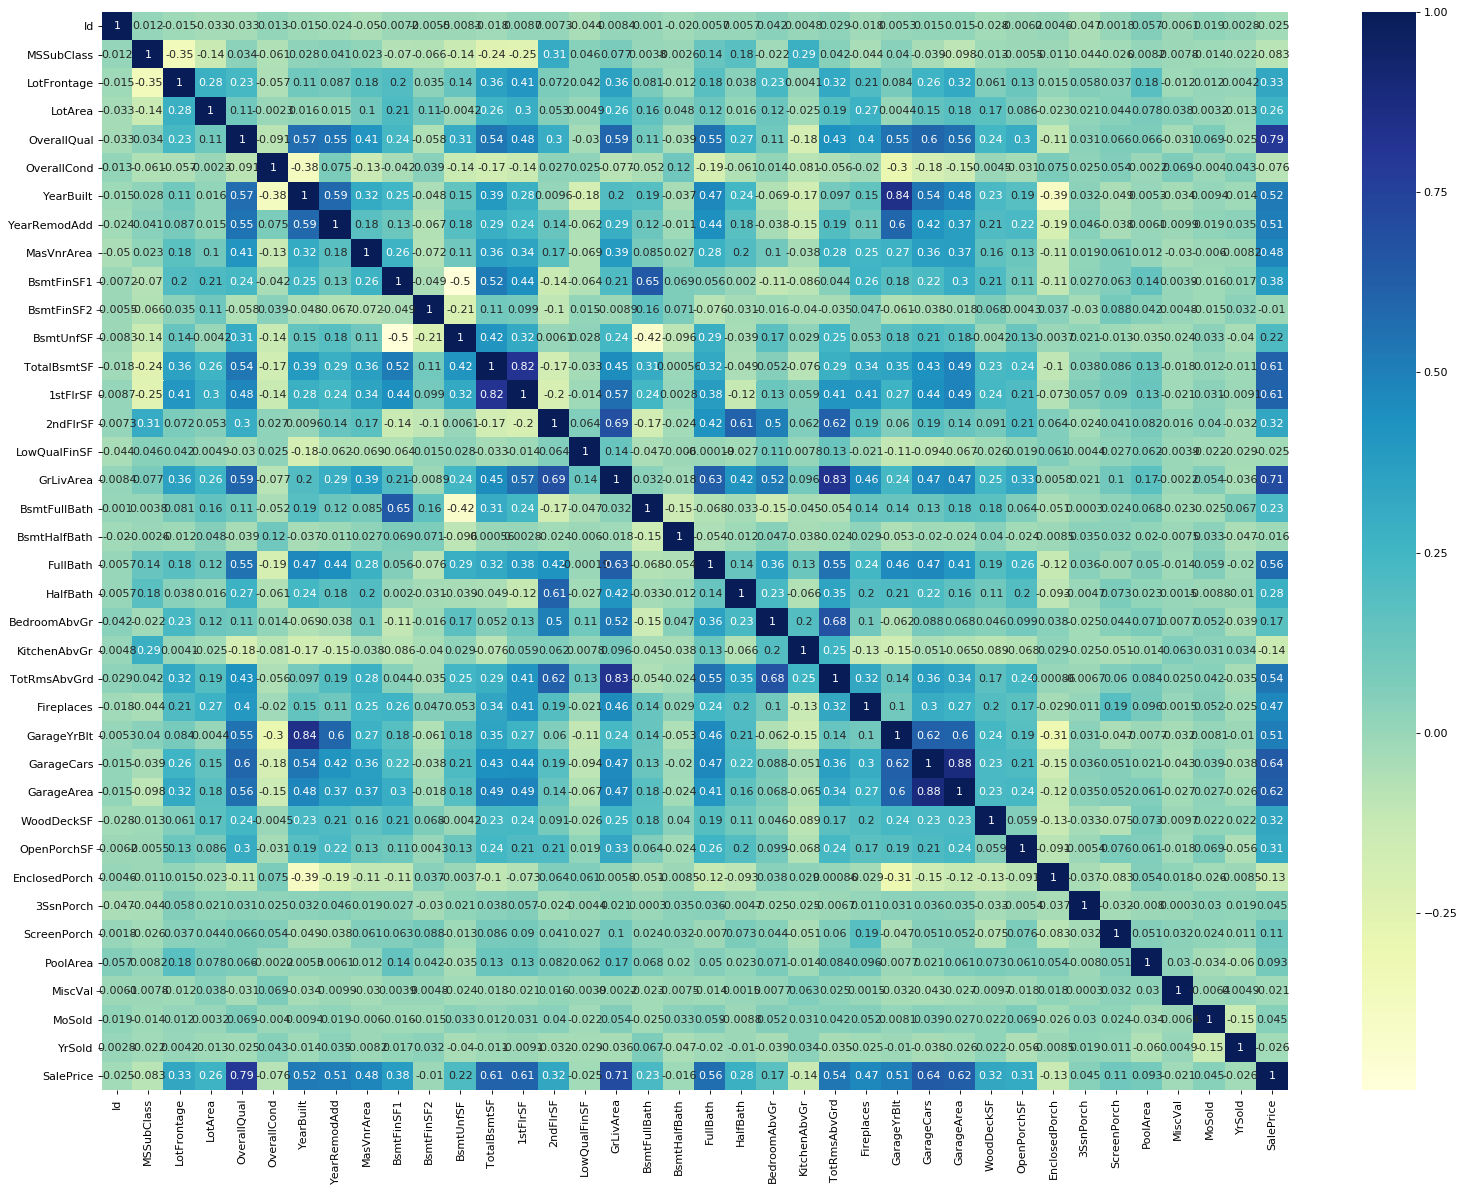

In [44]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = house.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [45]:
# Drooping columns with high correlation.
house = house.drop(['GarageYrBlt' ,'1stFlrSF' ,'LowQualFinSF' ,'GarageCars','TotRmsAbvGrd'],axis =1)


In [46]:
# Checking and removing duplicate rows
house.drop_duplicates(subset='Id')
house.shape

(1452, 76)

In [47]:
#Setting 'Id' as index as this is unique column value
house = house.set_index('Id')

<Figure size 1440x720 with 0 Axes>

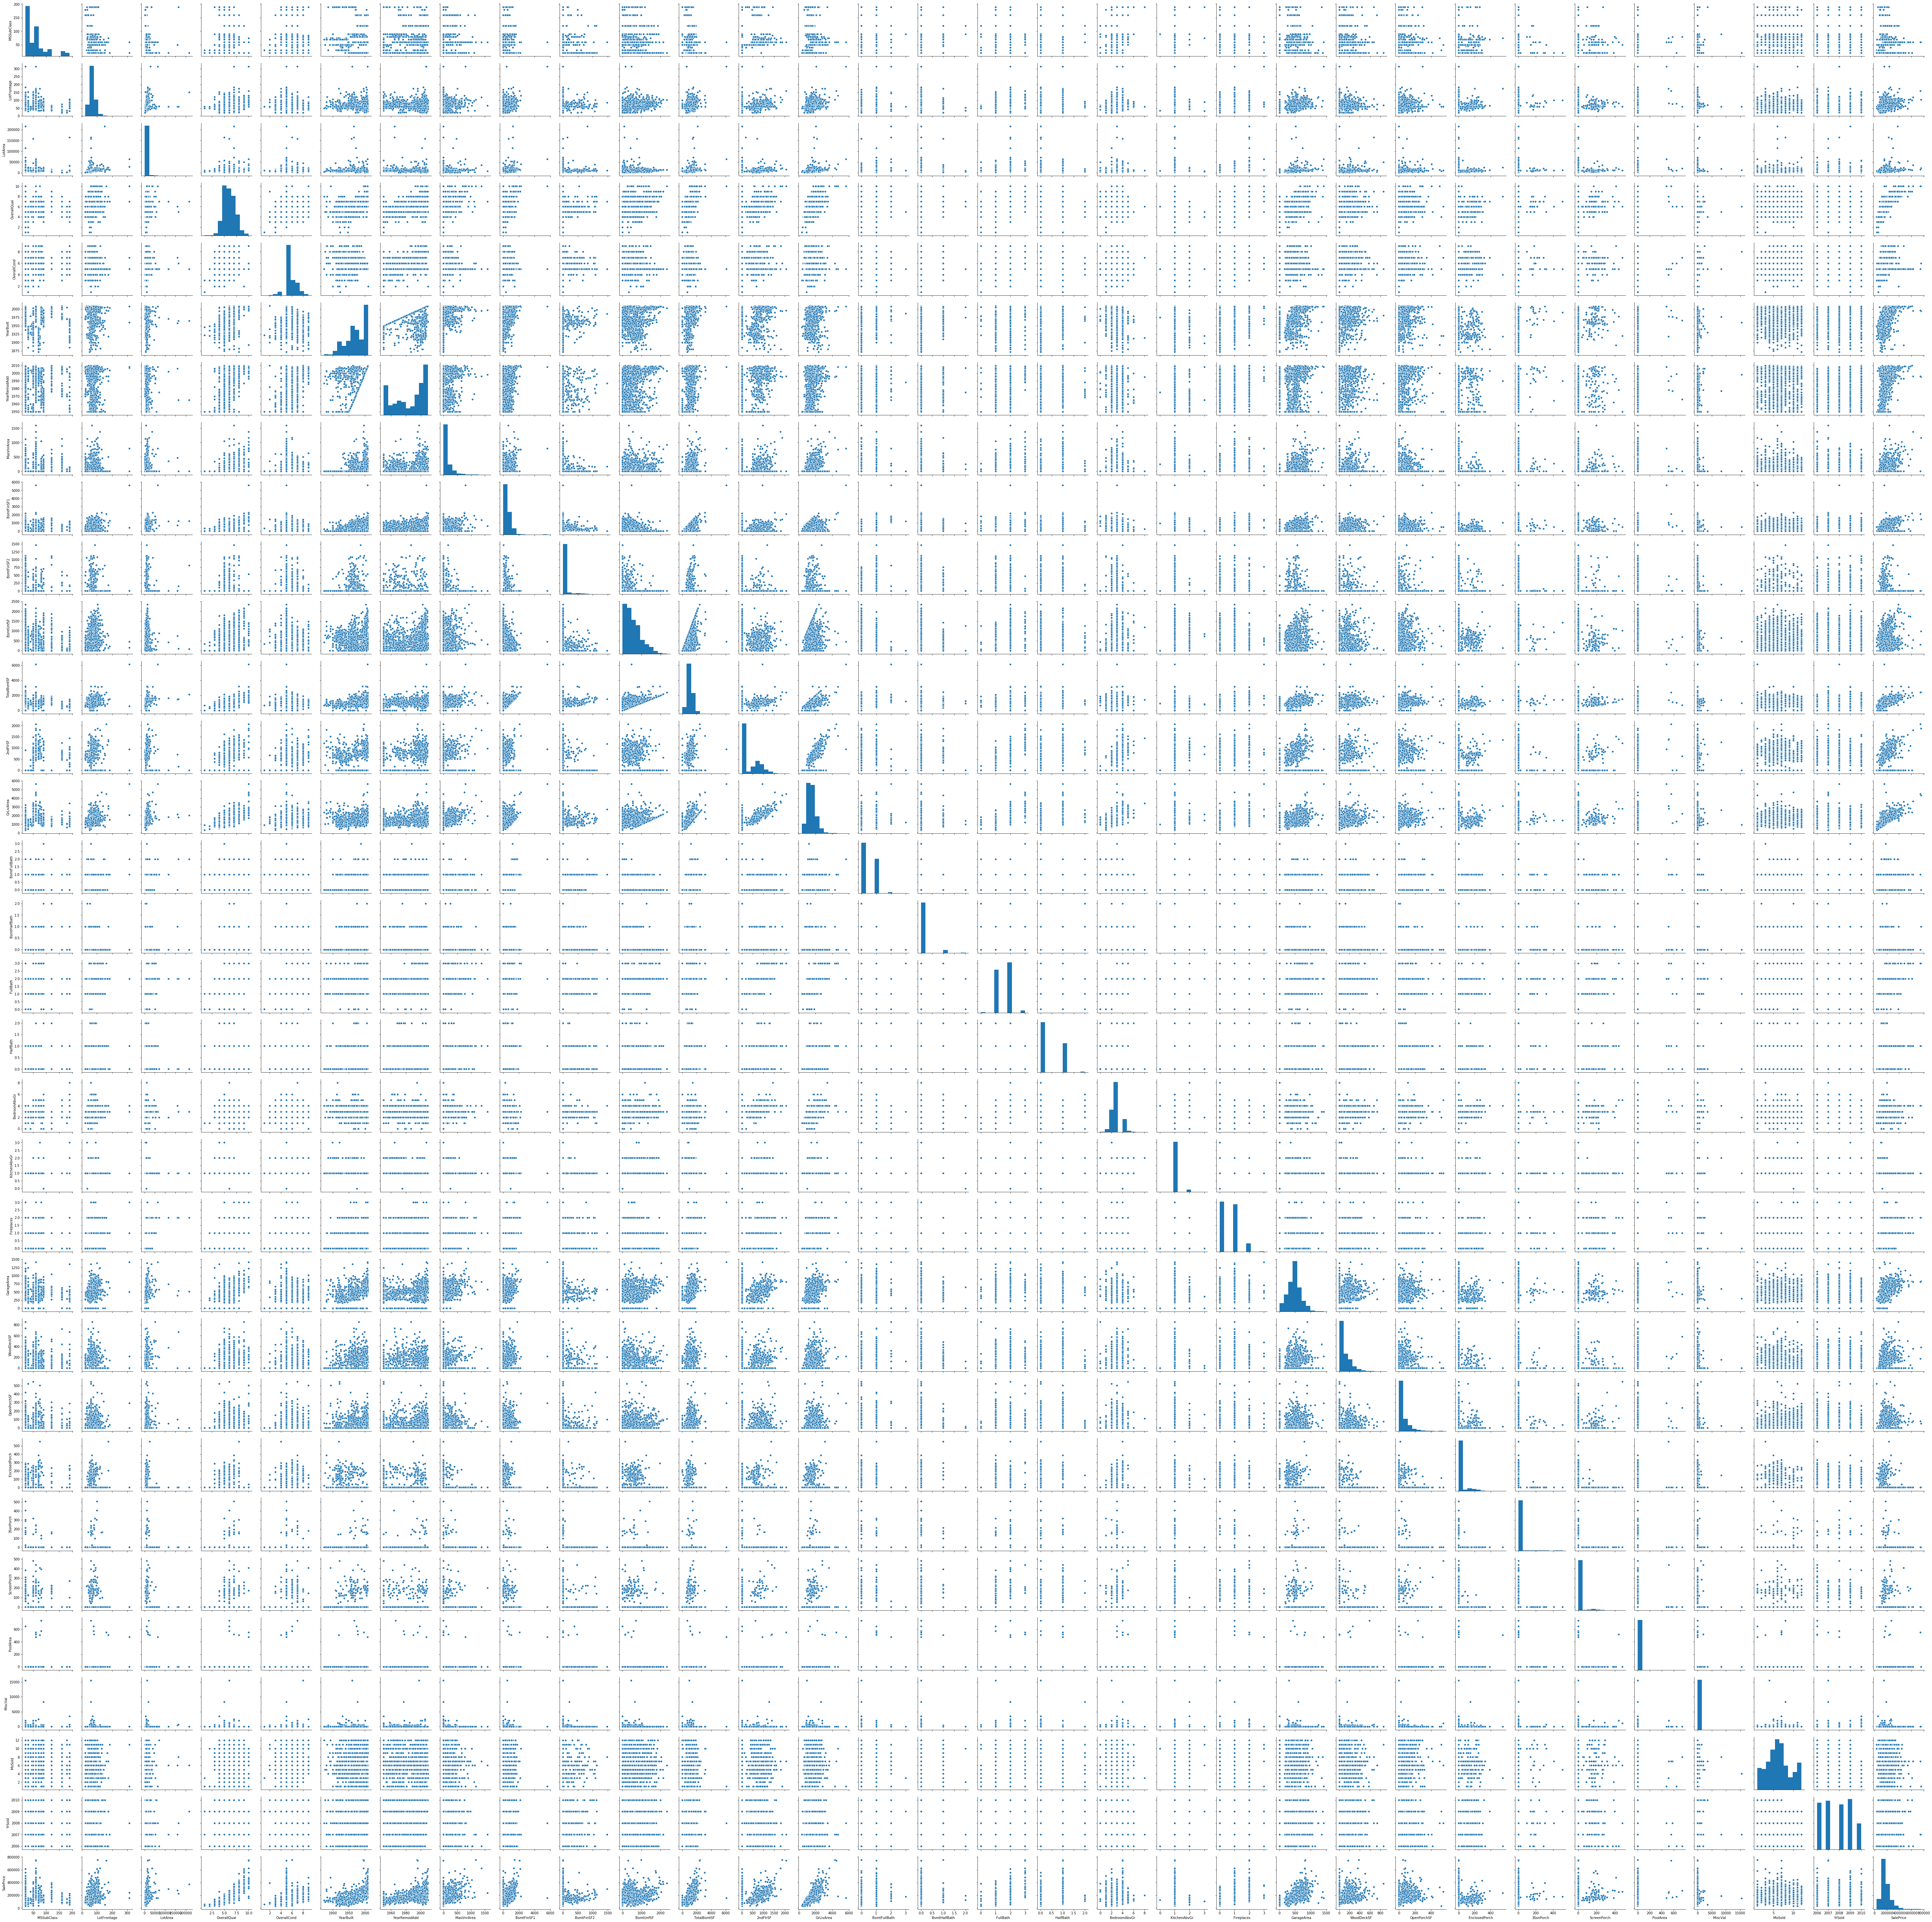

In [48]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(house)
plt.show()

In [49]:
house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1452.000000  1452.000000    1452.000000  1452.000000  1452.000000   
mean     56.949036    68.254821   10507.276171     6.092975     5.579201   
std      42.340097    22.363788    9989.563592     1.381289     1.113136   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7538.750000     5.000000     5.000000   
50%      50.000000    63.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1452.000000   1452.000000  1452.000000  1452.000000  1452.000000   
mean   1971.116391   1984.775482   103.685262   441.970386    46.805785   
std      30.193761     20.652466   181.066207   455.360279   161.726239   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   381.000000     0.000000   
75%    2000.000000   2004.000000   166.000000   706.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1452.000000  1452.000000    1452.000000  1452.000000   
mean       ...          94.416667    46.390496      21.937328     3.428375   
std        ...         125.393706    66.048619      61.089879    29.396943   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    24.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1452.000000  1452.000000   1452.000000  1452.000000  1452.000000   
mean     15.143939     2.774105     43.728650     6.318182  2007.815427   
std      55.899665    40.287389    497.478278     2.699644     1.328927   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1452.000000  
mean   180615.063361  
std     79285.541485  
min     34900.000000  
25%    129900.000000  
50%    162700.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 32 columns]

In [50]:
cols = house.columns
num_cols = house._get_numeric_data().columns
cat_col = list(set(cols) - set(num_cols))
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

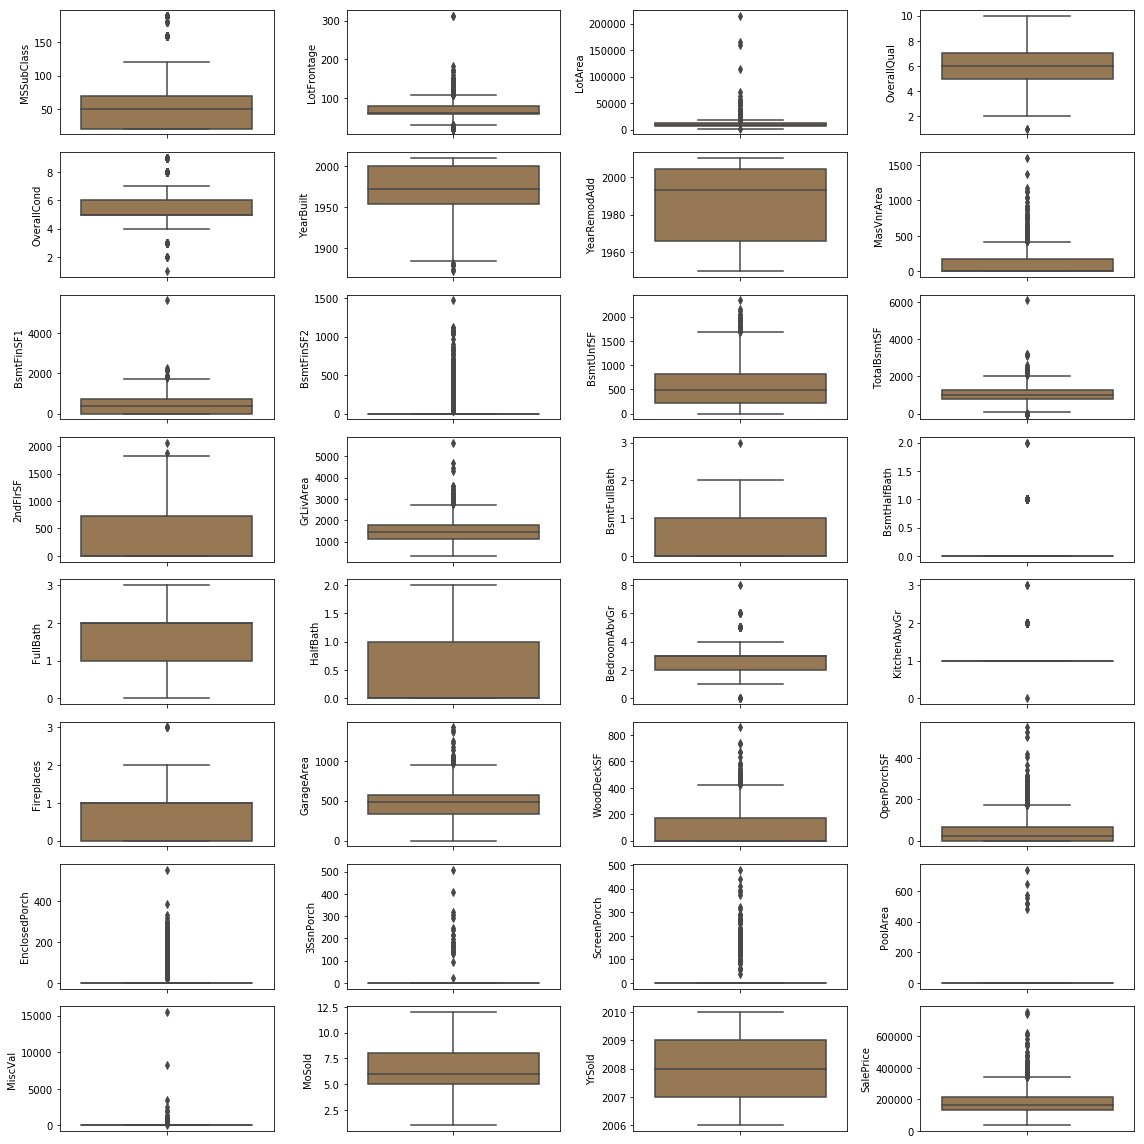

In [51]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(16,16))
    for var in var_list:
        plt.subplot(8,4,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=house)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

boxplot(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'])

In [52]:
# From above box plot we can clearly check that there are huge skew in data, which may lead to wrong prediction. 
# So removing such columns
skew_col = ['MiscVal','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','KitchenAbvGr','BsmtHalfBath', 'BsmtFinSF2', 'LotArea']

house = house.drop(skew_col,axis =1)

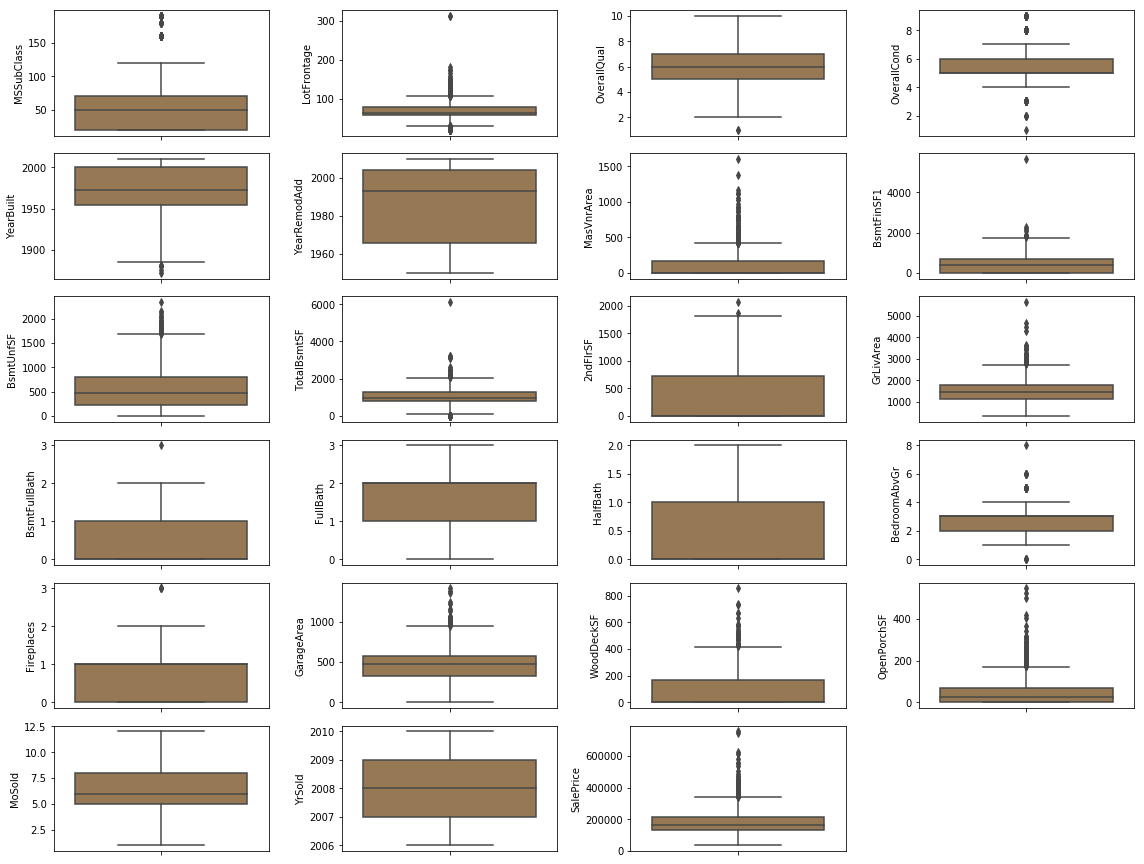

In [53]:
boxplot(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 
 'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','MoSold', 'YrSold', 'SalePrice'])


In [54]:
Q1 = house['SalePrice'].quantile(0.05)
Q3 = house['SalePrice'].quantile(0.70)
IQR = Q3 - Q1
house=house.loc[(house['SalePrice'] >= Q1 - 1.5*IQR) & (house['SalePrice'] <= Q3 + 1.4*IQR)]

house.shape

(1399, 66)

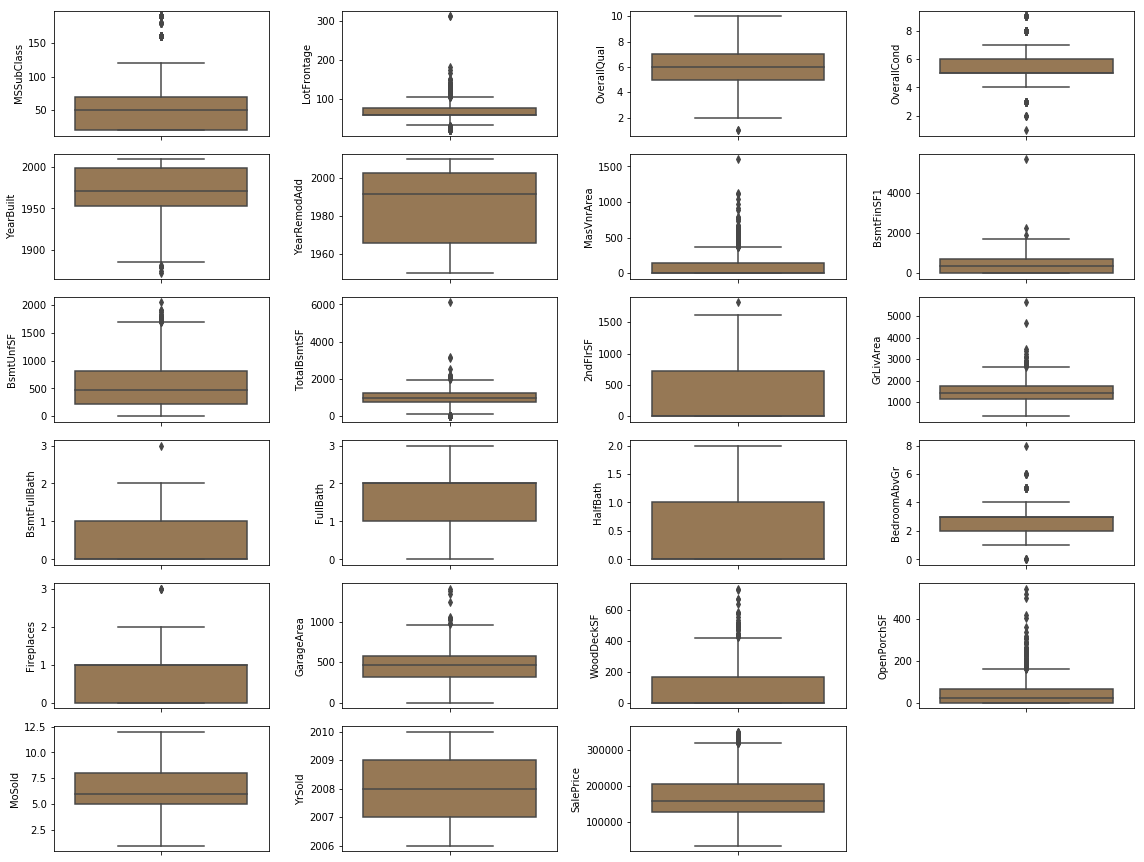

In [55]:
boxplot(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 
 'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','MoSold', 'YrSold', 'SalePrice'])


### Target Variable
#### SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 170948.18 and sigma = 60436.44



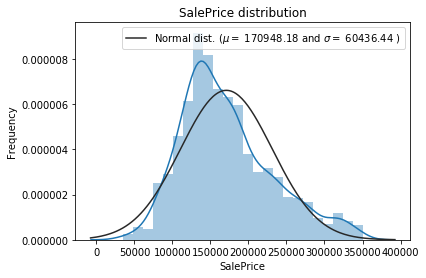

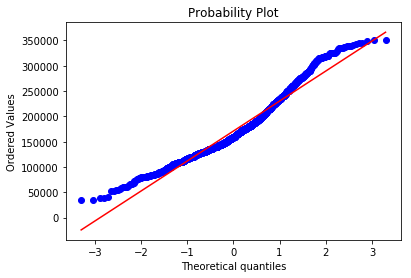

In [56]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(house['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(house['SalePrice'], plot=plt)
plt.show()


 mu = 11.99 and sigma = 0.36



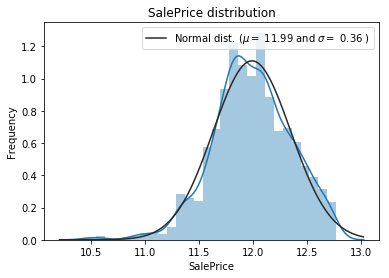

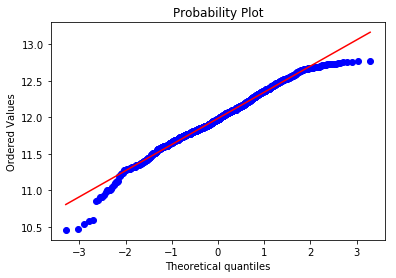

In [57]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house["SalePrice"] = np.log1p(house["SalePrice"])

#Check the new distribution 
sns.distplot(house['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(house['SalePrice'], plot=plt)
plt.show()

In [58]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(house[cat_col], drop_first=True)

# Adding the results to the master dataframe
house = pd.concat([house, dummy1], axis=1)
house.shape

(1399, 289)

In [59]:
house = house.drop(house[cat_col],axis=1)

In [60]:
# Putting response variable to y
y = house['SalePrice']
y.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [61]:
X = house.drop('SalePrice',axis=1)
X.head()

MSSubClass  LotFrontage  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1           60         65.0            7            5       2003   
2           20         80.0            6            8       1976   
3           60         68.0            7            5       2001   
4           70         60.0            7            5       1915   
5           60         84.0            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
Id                                                                 
1           2003       196.0         706        150          856   
2           1976         0.0         978        284         1262   
3           2002       162.0         486        434          920   
4           1970         0.0         216        540          756   
5           2000       350.0         655        490         1145   

         ...        BsmtFinType2_Rec  BsmtFinType2_Unf  GarageFinish_NoGarage  \
Id       ...                                                                    
1        ...                       0                 1                      0   
2        ...                       0                 1                      0   
3        ...                       0                 1                      0   
4        ...                       0                 1                      0   
5        ...                       0                 1                      0   

    GarageFinish_RFn  GarageFinish_Unf  FireplaceQu_Fa  FireplaceQu_Gd  \
Id                                                                       
1                  1                 0               0               0   
2                  1                 0               0               0   
3                  1                 0               0               0   
4                  0                 1               0               1   
5                  1                 0               0               0   

    FireplaceQu_NoFireplace  FireplaceQu_Po  FireplaceQu_TA  
Id                                                           
1                         1               0               0  
2                         0               0               1  
3                         0               0               1  
4                         0               0               0  
5                         0               0               1  

[5 rows x 245 columns]

In [62]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
X_train.describe()

MSSubClass  LotFrontage  OverallQual  OverallCond    YearBuilt  \
count  979.000000   979.000000   979.000000   979.000000   979.000000   
mean    57.400409    67.525026     5.992850     5.585291  1970.430031   
std     42.582280    20.468744     1.294534     1.141174    29.718894   
min     20.000000    21.000000     1.000000     1.000000  1872.000000   
25%     20.000000    60.000000     5.000000     5.000000  1953.500000   
50%     50.000000    62.000000     6.000000     5.000000  1971.000000   
75%     70.000000    78.000000     7.000000     6.000000  1999.000000   
max    190.000000   313.000000    10.000000     9.000000  2009.000000   

       YearRemodAdd  MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count    979.000000   979.00000   979.000000   979.000000   979.000000   
mean    1984.219612    91.67620   419.052094   554.402451  1019.399387   
std       20.607982   158.93265   434.347639   425.542345   411.090423   
min     1950.000000     0.00000     0.000000     0.000000     0.000000   
25%     1966.000000     0.00000     0.000000   216.000000   791.500000   
50%     1993.000000     0.00000   371.000000   462.000000   967.000000   
75%     2003.000000   144.50000   688.000000   808.000000  1247.500000   
max     2010.000000  1600.00000  5644.000000  1905.000000  6110.000000   

            ...        BsmtFinType2_Rec  BsmtFinType2_Unf  \
count       ...              979.000000        979.000000   
mean        ...                0.032686          0.856997   
std         ...                0.177905          0.350255   
min         ...                0.000000          0.000000   
25%         ...                0.000000          1.000000   
50%         ...                0.000000          1.000000   
75%         ...                0.000000          1.000000   
max         ...                1.000000          1.000000   

       GarageFinish_NoGarage  GarageFinish_RFn  GarageFinish_Unf  \
count             979.000000        979.000000        979.000000   
mean                0.057201          0.298264          0.426966   
std                 0.232345          0.457730          0.494890   
min                 0.000000          0.000000          0.000000   
25%                 0.000000          0.000000          0.000000   
50%                 0.000000          0.000000          0.000000   
75%                 0.000000          1.000000          1.000000   
max                 1.000000          1.000000          1.000000   

       FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_NoFireplace  \
count      979.000000      979.000000               979.000000   
mean         0.022472        0.242084                 0.490296   
std          0.148288        0.428564                 0.500161   
min          0.000000        0.000000                 0.000000   
25%          0.000000        0.000000                 0.000000   
50%          0.000000        0.000000                 0.000000   
75%          0.000000        0.000000                 1.000000   
max          1.000000        1.000000                 1.000000   

       FireplaceQu_Po  FireplaceQu_TA  
count      979.000000      979.000000  
mean         0.012257        0.224719  
std          0.110089        0.417611  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          0.000000        0.000000  
max          1.000000        1.000000  

[8 rows x 245 columns]

## Ridge 

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import metrics

In [65]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)

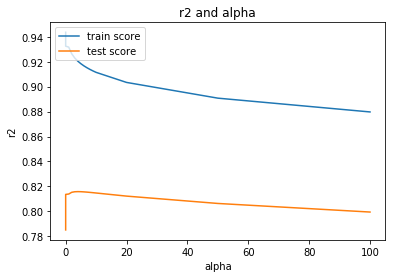

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
from sklearn.linear_model import ridge_regression
# Ridge regression
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8995552045583525
0.8491901210312844


In [74]:
#  model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
def sortSecond(val): 
    return val[1]  
li = list(zip(cols, model_parameters))
li.sort(key = sortSecond,reverse = True)  
li

[('constant', 18.325),
 ('Neighborhood_Crawfor', 0.079),
 ('OverallQual', 0.061),
 ('SaleCondition_Normal', 0.055),
 ('PoolQC_NoPool', 0.054),
 ('Exterior1st_BrkFace', 0.047),
 ('OverallCond', 0.044),
 ('BsmtFullBath', 0.044),
 ('MSZoning_RL', 0.044),
 ('Condition1_Norm', 0.04),
 ('Functional_Typ', 0.04),
 ('Neighborhood_NridgHt', 0.038),
 ('Neighborhood_NoRidge', 0.037),
 ('BldgType_2fmCon', 0.037),
 ('RoofMatl_CompShg', 0.036),
 ('MSZoning_FV', 0.035),
 ('BsmtCond_Gd', 0.035),
 ('Foundation_PConc', 0.035),
 ('BsmtExposure_Gd', 0.034),
 ('Neighborhood_ClearCr', 0.032),
 ('Neighborhood_Somerst', 0.031),
 ('PavedDrive_Y', 0.031),
 ('BsmtCond_TA', 0.03),
 ('FullBath', 0.029),
 ('HalfBath', 0.027),
 ('BsmtFinType2_Unf', 0.027),
 ('Neighborhood_StoneBr', 0.025),
 ('Heating_GasW', 0.025),
 ('LotShape_IR2', 0.023),
 ('MasVnrType_Stone', 0.023),
 ('SaleCondition_Partial', 0.022),
 ('LandContour_HLS', 0.022),
 ('FireplaceQu_Gd', 0.02),
 ('BedroomAbvGr', 0.019),
 ('HouseStyle_SFoyer', 0.019),
 

## Lasso

In [75]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.110226      0.018004         0.001594        0.000799      0.0001   
1       0.082554      0.022673         0.001795        0.000399      0.0002   
2       0.062776      0.022779         0.001595        0.000488      0.0003   
3       0.050375      0.014074         0.001396        0.000488      0.0004   
4       0.058057      0.009767         0.001396        0.000488      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.575593           0.893052           0.883371   
1  {'alpha': 0.0002}           0.569734           0.902252           0.892926   
2  {'alpha': 0.0003}           0.564704           0.903458           0.895136   
3  {'alpha': 0.0004}           0.564012           0.904996           0.896563   
4  {'alpha': 0.0005}           0.560028           0.905989           0.896335   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.873747       ...                0.818392        0.121807   
1           0.879839       ...                0.822486        0.126990   
2           0.877968       ...                0.821623        0.129170   
3           0.876342       ...                0.821552        0.129597   
4           0.877645       ...                0.821400        0.131474   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.938792            0.934950   
1                1            0.933503            0.929361   
2                2            0.927618            0.924505   
3                3            0.923921            0.920686   
4                4            0.920576            0.917413   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.938638            0.940979            0.940096   
1            0.932001            0.934257            0.935961   
2            0.926486            0.928620            0.932402   
3            0.922887            0.925283            0.928888   
4            0.919472            0.922816            0.925657   

   mean_train_score  std_train_score  
0          0.938691         0.002060  
1          0.933017         0.002229  
2          0.927926         0.002623  
3          0.924333         0.002728  
4          0.921187         0.002835  

[5 rows x 21 columns]

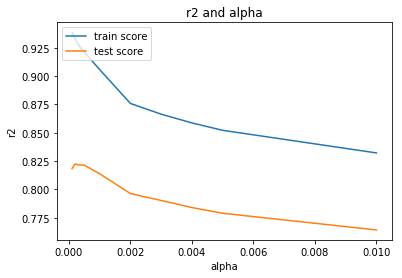

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
# lasso regression
lm = Lasso(alpha=0.003)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8604001687964588
0.8307563915571122


In [80]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
def sortSecond(val): 
    return val[1]  
li = list(zip(cols, model_parameters))
li.sort(key = sortSecond,reverse = True)  
li

[('constant', 12.55),
 ('OverallQual', 0.074),
 ('Neighborhood_Crawfor', 0.059),
 ('OverallCond', 0.051),
 ('BsmtFullBath', 0.039),
 ('Foundation_PConc', 0.03),
 ('Condition1_Norm', 0.028),
 ('SaleCondition_Normal', 0.024),
 ('GarageType_Attchd', 0.02),
 ('FireplaceQu_Gd', 0.02),
 ('Fireplaces', 0.018),
 ('BsmtFinType1_GLQ', 0.01),
 ('MSZoning_RL', 0.009),
 ('Functional_Typ', 0.008),
 ('BedroomAbvGr', 0.007),
 ('BsmtFinType2_Unf', 0.006),
 ('BsmtCond_TA', 0.005),
 ('ExterQual_Gd', 0.004),
 ('YearBuilt', 0.003),
 ('FullBath', 0.003),
 ('YearRemodAdd', 0.001),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.0),
 ('HalfBath', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('MoSold', 0.0),
 ('RoofMatl_CompShg', 0.0),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', 0.0),
 ('RoofMatl_Tar&Grv', -0.0),
 ('RoofMatl_WdShake', 0.0),
 ('RoofMatl_WdShngl', 0.0),
 ('Nei

### Conclusion:

#### Variables which are significant in predicting the price of a house
<ul> 
<li>OverallQual 			
<li>Neighborhood_Crawfor 	
<li>OverallCond 			
<li>BsmtFullBath 			
<li>Foundation_PConc 		
<li>Condition1_Norm 		
<li>SaleCondition_Normal 	
<li>GarageType_Attchd 		
<li>FireplaceQu_Gd 			
<li>Fireplaces 				
<li>BsmtFinType1_GLQ 		
</ul>

#### How well this variables describe the price of a house.
<ul>
<li>OverallQual :			0.074
<li>Neighborhood_Crawfor :	0.059
<li>OverallCond :			0.051
<li>BsmtFullBath :			0.039
<li>Foundation_PConc :		0.03
<li>Condition1_Norm:	0.028
<li>SaleCondition_Normal: 	0.024
<li>GarageType_Attchd :		0.02
<li>FireplaceQu_Gd 		:	0.02
<li>Fireplaces 		:		0.018
<li>BsmtFinType1_GLQ :		0.01
</ul>

#### Optimal value of lambda for ridge and lasso regression.

<b>Lambda for Ridge: 20<br>
<b>Lambda for Lasso: 0.003
